<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Symbolic computing 3: Generating functions


## Table of contents

- [Basics of generating functions](#GeneratingFunctions)
- [The towers of Hanoi with GF](#HanoiGF)
- [A pair of GF](#Pair)
- [GF and Binary Trees](#Catalan)




In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<a id="GeneratingFunctions"></a>
## Basics of generating functions

Let us first explain how we will handle generating functions with `SymPy`. We deal with the example of 
<br><br>
$$
f(x)=\frac{1}{1-2x}=1+2x+4x^2+8x^3+16x^4+ \dots
$$
<br>
We first introduce variable $x$ and function $f$ as follows:

In [3]:
x=var('x')
f=(1/(1-2*x))

print('f = '+str(f))
print('series expansion of f at 0 and of order 10 is: '+str(f.series(x,0,10)))


f = 1/(-2*x + 1)
series expansion of f at 0 and of order 10 is: 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)


One can extract coefficient $n$ as follows:
* $f$ has to be truncated at order $k$ (for some $k>n$) with `f.series(x,0,k)`
* the $n$-th coefficient is then extracted by `f.coeff(x**n)`

In [4]:
f_truncated = f.series(x,0,8)
print('Truncation of f is '+str(f_truncated))
n=6
nthcoefficient=f_truncated.coeff(x**n)
print(str(n)+'th coefficient is: '+str(nthcoefficient))


Truncation of f is 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)
6th coefficient is: 64


### Exercise 1. Fibonacci generating function

In class we proved that the generating function of the Fibonacci sequence is given by:
$$
\mathrm{Fib}(x)=\frac{1}{1-x-x^2}.
$$

<div markdown=1 class="DoIt"> 
1. Write a recursive function `Fibonacci(n)` which returns the $n$-th Fibonacci number.
2. Write another function `FibonacciGF(n)` which also returns the $n$-th Fibonacci number by extracting the $n$-th coefficient in $\mathrm{Fib}(x)$.

In [33]:
def Fibonacci(n):
    if n == 1:
        return 1
    elif n==2:
        return 2
    else:
        return fibo(n-1) + fibo(n-2)
    


def FibonacciGF(n):
    x = var('x')
    Fib = (1/(1-x-x**2))
    trunc = Fib.series(x,0,n+1)
    return trunc.coeff(x**n)

FibonacciGF(2)

2

<div markdown=1 class="DoIt"> 
1. Complete the following script (which uses `time.clock()`) to plot the execution times of `Fibonacci(n)`, `FibonacciGF(n)` as a function of $n$ (try with $20\leq n \leq 35$).
2. What do you observe?

In [46]:
import time

# Your code here
a=20
b=36
t1 = np.zeros(b-a)
t2 = np.zeros(b-a)
i = 0

R = np.arange(a,b)

for n in range(a,b):
    time1=time.process_time()
    a = Fibonacci(n)
    time2=time.process_time()
    t1[i] = time2 - time1
    i = i+1
    
i= 0
for n in range(a,b):
    time1=time.process_time()
    a = FibonacciGF(n)
    time2=time.process_time()
    t2[i] = time2 - time1

    

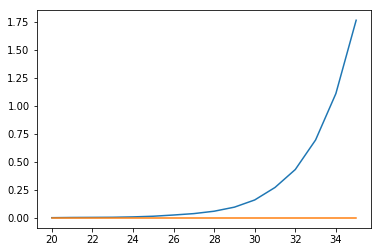

In [48]:
fig = plt.figure
plt.plot(R,t1)
plt.plot(R,t2)
plt.show()

<div markdown=1 class="Answers">
2.

<a id="HanoiGF"></a>
### Exercise 2. Hanoi with four rods: the generating function approach

In the previous lab we saw a strategy for the towers of Hanoi with $4$ rods such that the number $J_n$ of moves for $n$ disks satisfies:
\begin{align}
J_1&=1, \notag\\
J_2&=3,\notag\\
J_n&=2J_{n-2}+3 \qquad (\text{ for every }n\geq 3). \tag{#}
\end{align}


<div markdown=1 class="DoIt"> 
1. Find the expression for the generating function $\mathcal{J}(x)$ of the $J_n$'s.<br>
<i>(Recall that you can ask `SymPy` to solve any equation.)</i>
2. Write a function `HanoiGF(n)` which extracts the $n$-th coefficient in $\mathcal{J}(x)$.

<div markdown=1 class="Answers"> 1.

<div markdown=1 class="Answers">
I obtain
$$
\mathcal{J}(x)= 
$$

In [60]:
def HanoiGF(n):
    x = var('x')
    J = (x*(2*x+1)/(2*x**3-2*x**2-x+1))
    series = J.series(x,0,n+1)
    return series.coeff(x**n)

print(HanoiGF(50))
print(sqrt(2.**50))

100663293
33554432.0000000


<div markdown=1 class="DoIt"> 
1. What is the radius of convergence of $\mathcal{J}(x)$?
2. What does it imply for the asymptotic behaviour of $J_n$? (Apply the "exponential growth formula", that we saw in class.)<br>
3. Compare your result with the exact formula for $J_n$ that you obtained in the previous Notebook. Is it consistent?

<div markdown=1 class="Answers"> 
1. 
2. 
3. 

<a id="Pair"></a>
### Exercise 3. A pair of generating functions

Let $a_n,b_n$ be defined by $a_1=b_1=1$ and, for every $n\geq 1$,
\begin{equation}
\begin{cases}
a_{n+1}&= a_n +2b_n,\\
b_{n+1}&= a_n +b_n.
\end{cases}
\tag{&}
\end{equation}
<i>(This is our example of Lab 2 and Lab 5: $a_n,b_n$ are defined by $(1+\sqrt{2})^{n}=a_n+b_n\sqrt{2}$.</i>

<div markdown=1 class="DoIt"> 
1. Find a $2\times 2$ system whose solutions are $A(x),B(x)$ , where $A,B$ are the generating functions of sequences $(a_n)_{n\geq 1},(b_n)_{n\geq 1}$. <i>(Coefficients of this system should depend on $x$.)</i>
2. Solve this system with `solve` and write a script which uses function $A$ to return $a_1,\dots,a_{20}$.

<div markdown=1 class="Answers">
1. 

In [67]:
#---- Question 2
x=symbols('x')
B=symbols('b')
SeriesB=solve(B/x - 1 - (x*(1 + 2*B))/(1-x) + B,B)
print(SeriesB)

[-x/(3*x**2 - 1)]


<a id="Catalan"></a>
### Exercise 4.  Binary trees with generating functions

A <i>binary tree</i> is a tree in which every internal node (in grey in above pictures) has exactly two children. Leaves (in green) have no children. The **size** of a binary tree is its number of internal nodes. There is one binary tree of size $1$, and two binary trees of size $2$, five binary trees of size $3$:
<br>
<img src="./figures/BinaryTree.jpg" alt="Roots" style="width: 700px;"/>

Let $t_n$ be the number of ternary trees of size $n$, by convention we put $t_0=1$ (this corresponds to a leaf without any internal node). We will use generating function to compute values of $t_n$, we have
$$
t_0=1,t_1=1,t_2=2,t_3=5.
$$
<br>
Set
$$
T(z)=\sum_{n\geq 0}t_n z^n.
$$

<div markdown=1 class="DoIt"> 
1. Justify that for every $n\geq 1$
$$
t_n = \sum_{\substack{n_1,n_2 \geq 0\\ n_1+n_2=n-1}} t_{n_1}t_{n_2}.
$$
<i>For example</i>
$$
t_3=t_2t_0+t_1t_1+t_0t_2=2\times 1 + 1\times 1+ 1\times 2=5,
$$
as expected. We already met this recurrence in Lab Arithmetic 2: the $t_n$'s are the Catalan numbers.

<div markdown=1 class="Answers"> 
1.

We have seen in class that $T(z)$ is a solution of the following algebraic equation of degree $2$: 
\begin{equation}
T(z)=1+zT(z)^2. \tag{$\star$} 
\end{equation}
(In this equation, $T(z)$ is the unknown and $z$ is a parameter.)

<div markdown=1 class="DoIt"> 
1. Use `SymPy` to solve equation ($\star$), and deduce a formula for $T(z)$. (Export your results in $\texttt{LateX}$ and explain what your script computes.)<br>
2. Write a script which uses the generating function $T$ to compute $t_1,t_2,\dots,t_{20}$.

In [80]:
x = symbols('x')
T = symbols('T')
solve(T - 1 - x*T**2,T)

T = (-sqrt(-4*x + 1) + 1)/(2*x)
def coeffT(n):
    trunc = T.series(x,0,n+1)
    return trunc.coeff(x**n)
coeffT(7)

429

<div markdown=1 class="Answers"> Justification for the above script.


In [15]:
# Question 2